# Introduction

This notebook loads the MapAI data from the Huggingface. See the code below.

You can also use the following link to download the dataset, that has been already prepared and all the mislabeled images have been removed.

Access here: https://drive.google.com/file/d/1wEIswMtJuQyf7fnbNqNeSmwSlBn36sZt/view?usp=sharing

# Download the data

In [2]:
# !pip install datasets

from pathlib import Path
import shutil
from datasets import load_dataset
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import cv2

import sys
sys.path.append("../src")

/home/shymon/anaconda3/envs/torch/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset("sjyhne/mapai_dataset")

Found cached dataset parquet (/home/shymon/.cache/huggingface/datasets/sjyhne___parquet/sjyhne--mapai_dataset-a29285241f23b7c3/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 4/4 [00:00<00:00, 168.18it/s]


In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 7000
    })
    validation: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 1500
    })
    task1_test: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 1368
    })
    task2_test: Dataset({
        features: ['image', 'lidar', 'mask', 'filename'],
        num_rows: 978
    })
})

In [5]:
from pathlib import Path
import shutil

#### Paths ####
# Update this to wherever you want to store data
DATADIR = Path("/home/shymon/datasets/mapai-full")

# MapAI
MAPAI_TRAIN = DATADIR/'train'
MAPAI_MASKS = MAPAI_TRAIN/'masks'
MAPAI_PATCHES = MAPAI_TRAIN/'patches'

MAPAI_VAL = DATADIR/'validation'
MAPAI_VAL_MASKS = MAPAI_VAL/'masks'
MAPAI_VAL_PREDS = MAPAI_VAL/'predictions'

print(DATADIR)

# DataLoader
train, val = dataset['train'], dataset['validation']
test1, test2 = dataset['task1_test'], dataset['task2_test']

/home/shymon/datasets/mapai-full


In [6]:
train['image'][0], train['lidar'][0], train['mask'][0], 

(<PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=500x500>,
 <PIL.TiffImagePlugin.TiffImageFile image mode=F size=500x500>,
 <PIL.TiffImagePlugin.TiffImageFile image mode=L size=500x500>)

There are some mislabeled images in the dataset. The two bash scripts:

 - move_train.sh
 - move_val.sh

 can be used to remove the mislabeled images

#### Plot an instance from the dataset

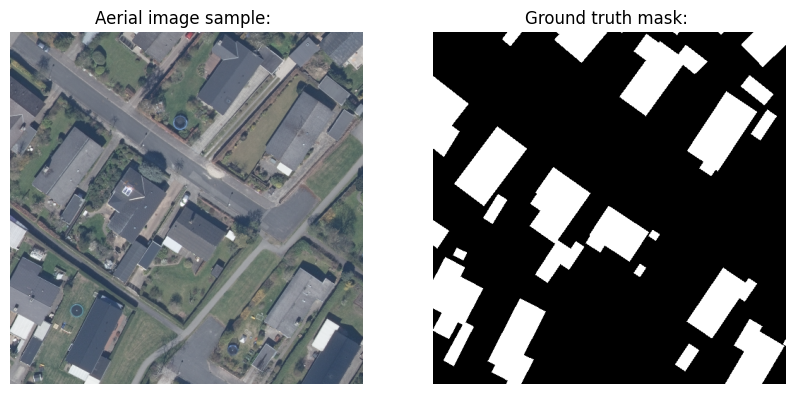

In [7]:

n = 5120

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.set_title('Aerial image sample: ')
ax1.imshow(train['image'][n])
ax1.set_axis_off()

ax2.set_title('Ground truth mask: ')
ax2.imshow(train['mask'][n], cmap='gray')
ax2.set_axis_off()

fig.savefig("mapai.png", bbox_inches = 'tight', pad_inches = 0.2)

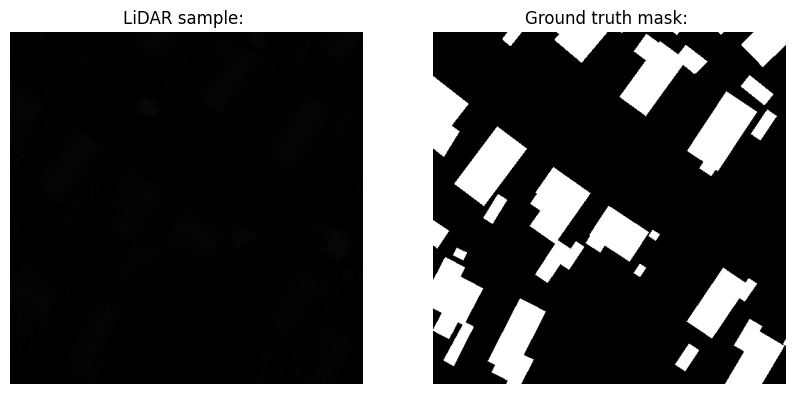

In [15]:
import matplotlib.pyplot as plt

n = 5120

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

ax1.set_title('LiDAR sample: ')
ax1.imshow(train['lidar'][n], cmap='gray')
ax1.set_axis_off()

ax2.set_title('Ground truth mask: ')
ax2.imshow(train['mask'][n], cmap='gray')
ax2.set_axis_off()

fig.savefig("mapai-lidar.png", bbox_inches = 'tight', pad_inches = 0.2)